# Sinusoidal Data

## Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from google.colab import files

## Data Preparation

### Data Generation

In [2]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T

### Data Visualisation

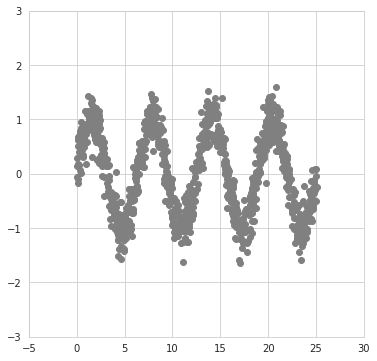

In [3]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,30])
plt.ylim([-3.,3.])

plt.show()

### Save to csv

In [5]:
label=np.zeros(1000, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal.csv', sep='\t')
files.download("Sinusoidal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest

This process is done on local machine.

## Obtain Anomaly scores

In [6]:
files.upload()
files.upload()

Saving Sinusoidal.csviForestAnomalyScore_0.csv to Sinusoidal.csviForestAnomalyScore_0.csv


Saving Sinusoidal.csviForestAnomalyScore_1.csv to Sinusoidal.csviForestAnomalyScore_1.csv


{'Sinusoidal.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.482778 1\n1 0.482253 0\n2 0.499466 0\n3 0.554439 0\n4 0.48033 0\n5 0.634887 0\n6 0.48823 0\n7 0.489495 0\n8 0.495386 0\n9 0.48609 0\n10 0.570613 0\n11 0.469289 0\n12 0.487488 0\n13 0.472163 0\n14 0.489717 0\n15 0.488364 0\n16 0.489291 0\n17 0.523376 0\n18 0.473226 0\n19 0.548209 0\n20 0.493861 0\n21 0.479372 0\n22 0.552333 0\n23 0.489517 0\n24 0.55982 0\n25 0.502904 0\n26 0.47299 0\n27 0.49633 0\n28 0.52 0\n29 0.47846 0\n30 0.470053 0\n31 0.545006 0\n32 0.488593 0\n33 0.489293 0\n34 0.486935 0\n35 0.483058 0\n36 0.466744 0\n37 0.474923 0\n38 0.530074 0\n39 0.483137 0\n40 0.478795 0\n41 0.51276 0\n42 0.490664 0\n43 0.48186 0\n44 0.479628 0\n45 0.530655 0\n46 0.482795 0\n47 0.494848 0\n48 0.51093 0\n49 0.49915 0\n50 0.574337 0\n51 0.479611 0\n52 0.522277 0\n53 0.474394 0\n54 0.491873 0\n55 0.510752 0\n56 0.494824 0\n57 0.507563 0\n58 0.503111 0\n59 0.490571 0\n60 0.503532 0\n61 0.484897 0\n62 0.483902 0\n63 0.4

In [7]:
data = pd.read_csv("Sinusoidal.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("Sinusoidal.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(np.min(S0))
print(np.max(S0))

0.464744
0.670093


### Visualise Scores

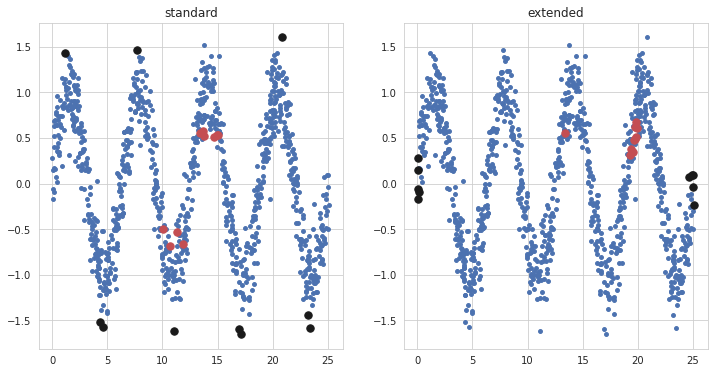

In [8]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


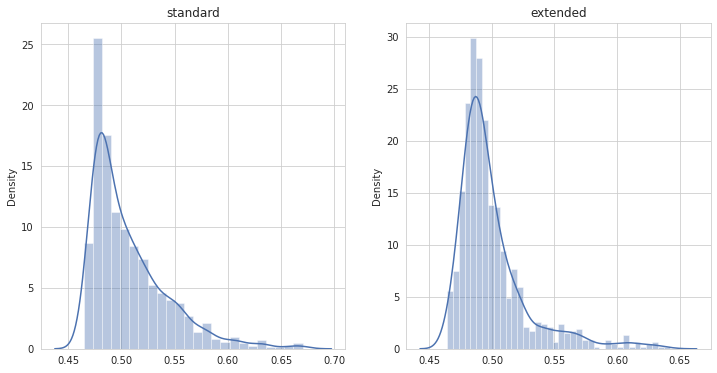

In [9]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Maps

In [11]:
xx, yy = np.meshgrid(np.linspace(-5, 30, 30), np.linspace(-3, 3, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal_heatmap.csv', sep='\t')
files.download("Sinusoidal_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
files.upload()
files.upload()

Saving Sinusoidal_heatmap.csviForestAnomalyScore_0.csv to Sinusoidal_heatmap.csviForestAnomalyScore_0.csv


Saving Sinusoidal_heatmap.csviForestAnomalyScore_1.csv to Sinusoidal_heatmap.csviForestAnomalyScore_1.csv


{'Sinusoidal_heatmap.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.675763 0\n1 0.676675 0\n2 0.679461 0\n3 0.675976 0\n4 0.665534 0\n5 0.657853 0\n6 0.641501 0\n7 0.619603 0\n8 0.600045 0\n9 0.602735 0\n10 0.61463 0\n11 0.614648 0\n12 0.604034 0\n13 0.596118 0\n14 0.59485 0\n15 0.61151 0\n16 0.614167 0\n17 0.60066 0\n18 0.604441 0\n19 0.603997 0\n20 0.601593 0\n21 0.610888 0\n22 0.629213 0\n23 0.637108 0\n24 0.648306 0\n25 0.650781 0\n26 0.652049 0\n27 0.656799 0\n28 0.662912 0\n29 0.666498 0\n30 0.678183 0\n31 0.67452 0\n32 0.679627 0\n33 0.675961 0\n34 0.672542 0\n35 0.656945 0\n36 0.640008 0\n37 0.616098 0\n38 0.595916 0\n39 0.600496 0\n40 0.61008 0\n41 0.614881 0\n42 0.598387 0\n43 0.596526 0\n44 0.593864 0\n45 0.607212 0\n46 0.607954 0\n47 0.598054 0\n48 0.599307 0\n49 0.598586 0\n50 0.596091 0\n51 0.609051 0\n52 0.625425 0\n53 0.632083 0\n54 0.644362 0\n55 0.64992 0\n56 0.651661 0\n57 0.657972 0\n58 0.662155 0\n59 0.66572 0\n60 0.677467 0\n61 0.678348 0\n62 0.6

In [13]:
data = pd.read_csv("Sinusoidal_heatmap.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("Sinusoidal_heatmap.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.470304
0.715411


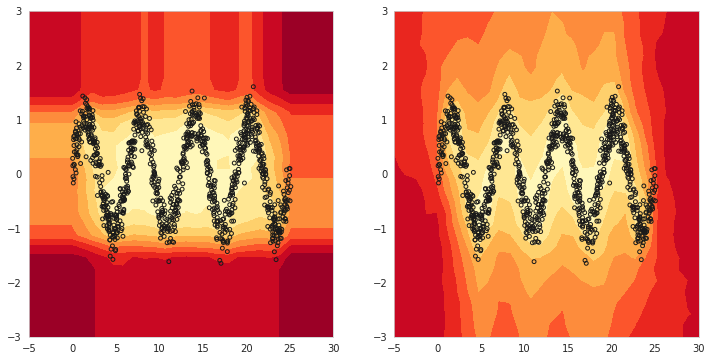

In [15]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S0),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')


plt.show()